In [2]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import binom,norm,poisson,geom,chisquare,chi2_contingency,ttest_ind,ttest_rel
a = pd.read_csv("aerofit_treadmill.csv")
a.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [3]:
a.ndim,a.shape

(2, (180, 9))

There are 180 rows and 9 columns

In [4]:
a.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [5]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


 Problem Statement : The aim is to analyse the data to provide actionable recommendations for Aerofit products.It suggests
 using data insights to analyze and to identify the characteristics of the target audience for each type of treadmill offered by the
 company and to improve the business towards new customers.

Checking missing values in the dataset

In [6]:
print("Missing values in each column:")
print(a.isnull().sum())

Missing values in each column:
Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64


There are no missing values in the dataset

Creating Boxplot

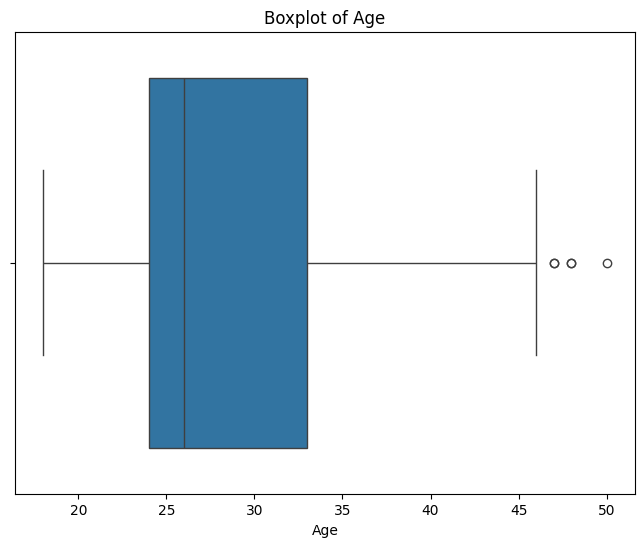

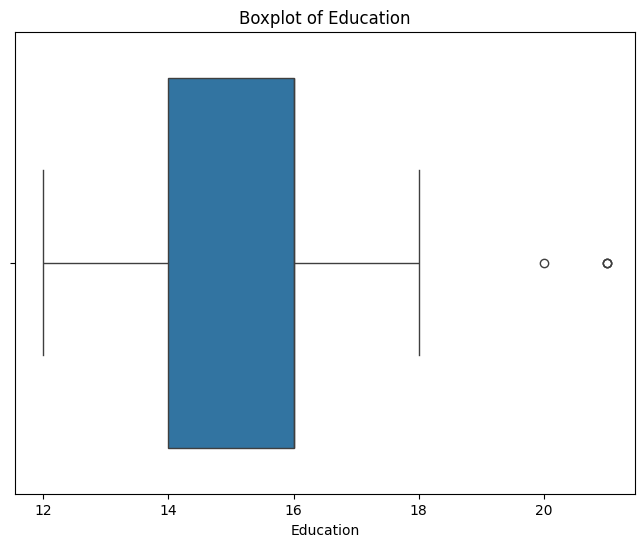

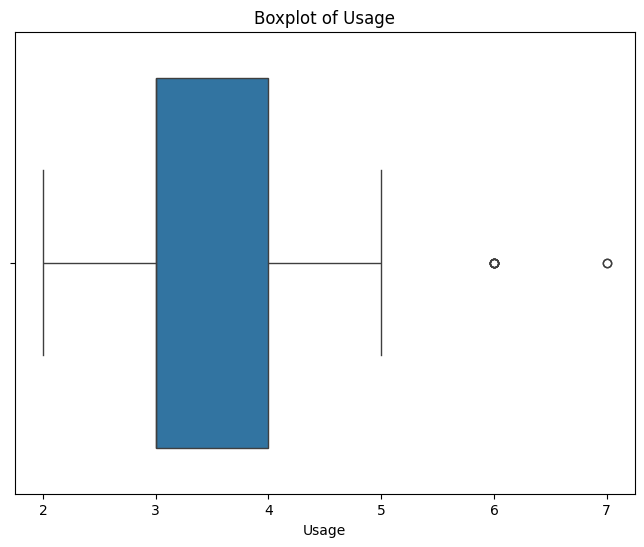

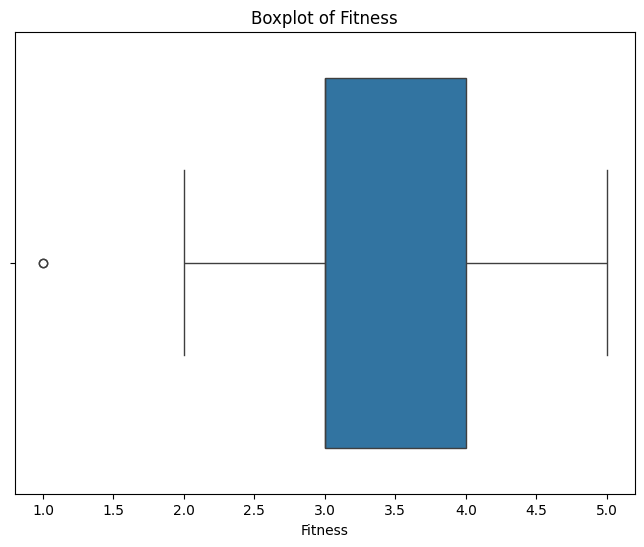

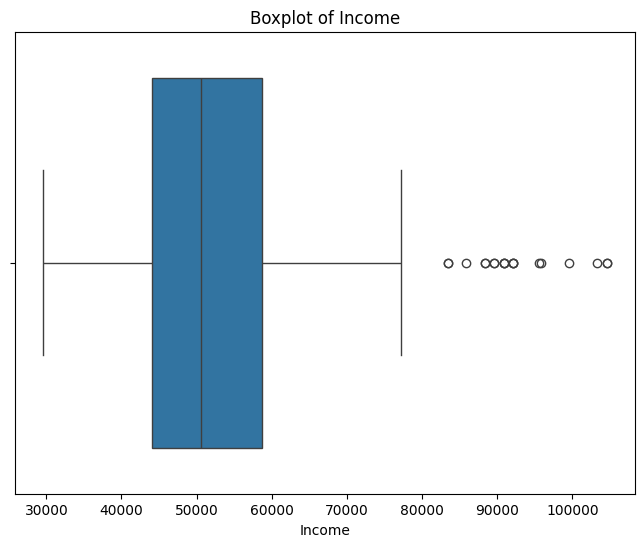

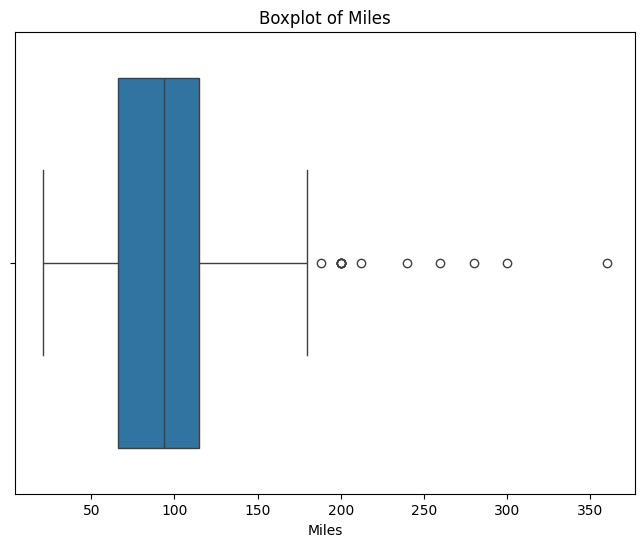

In [7]:
continuous_vars = ['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']
# Create boxplots for each continuous variable to visualize outliers
for var in continuous_vars:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=a[var])
    plt.title(f'Boxplot of {var}')
    plt.xlabel(var)
    plt.show()

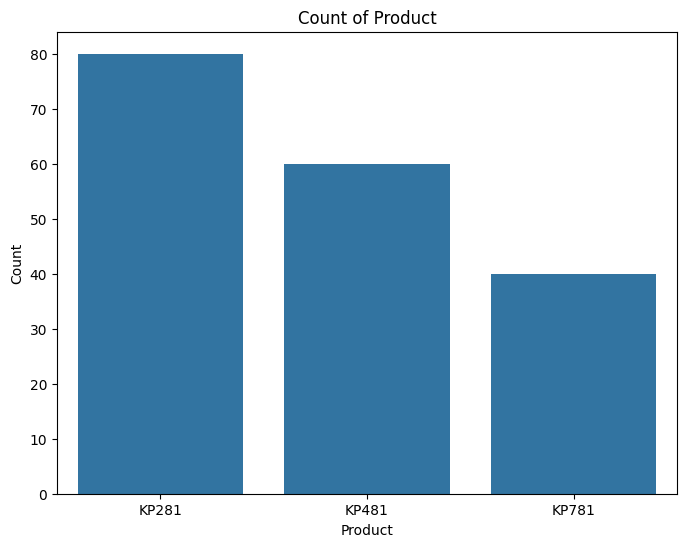

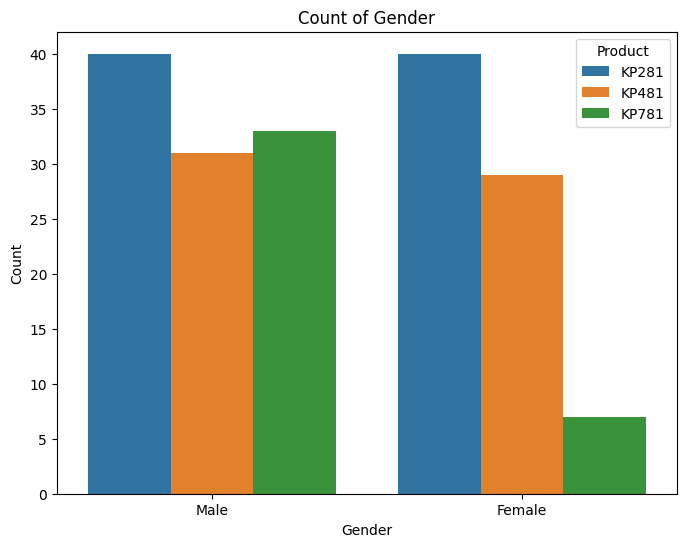

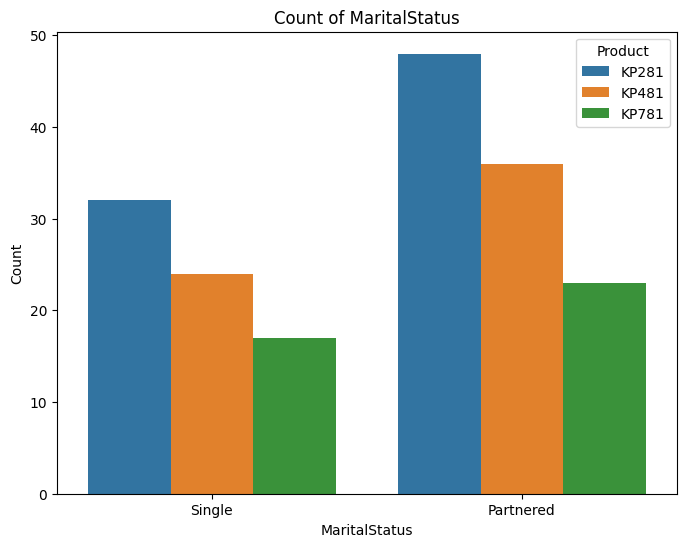

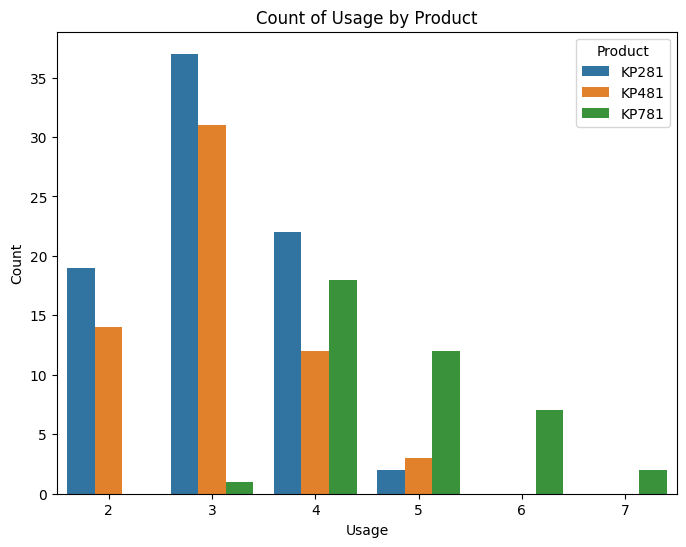

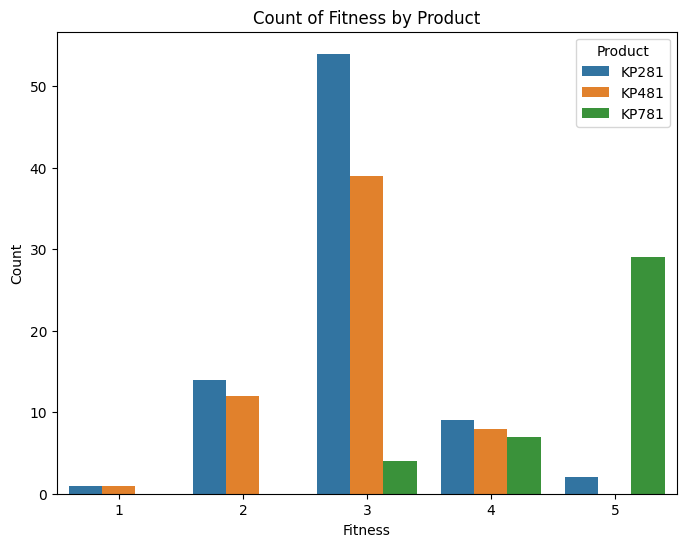

In [8]:
# Analyze categorical variables
categorical_vars = ['Product', 'Gender', 'MaritalStatus']
for var in categorical_vars:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=a, x=var, hue='Product' if var != 'Product' else None)
    plt.title(f'Count of {var}')
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.show()
# Analyze Usage and Fitness levels by Product
usage_fitness_vars = ['Usage', 'Fitness']
for var in usage_fitness_vars:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=a, x=var, hue='Product')
    plt.title(f'Count of {var} by Product')
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.show()

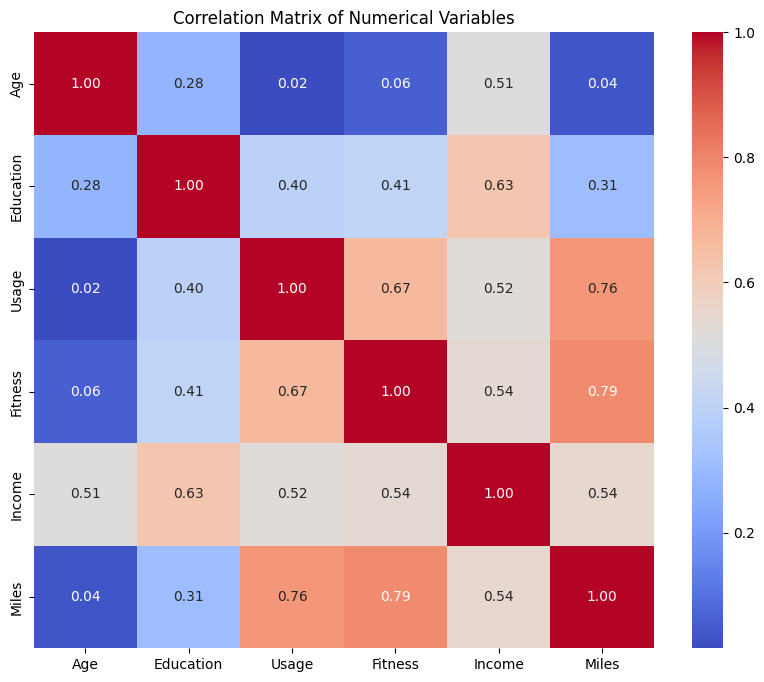

In [9]:
# Analyze correlations between numerical variables
numerical_vars = ['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']
correlation_matrix = a[numerical_vars].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

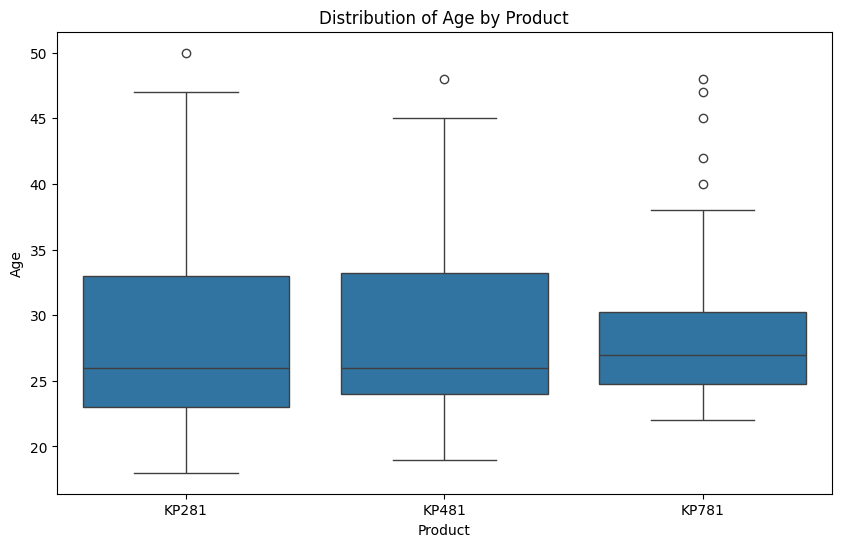

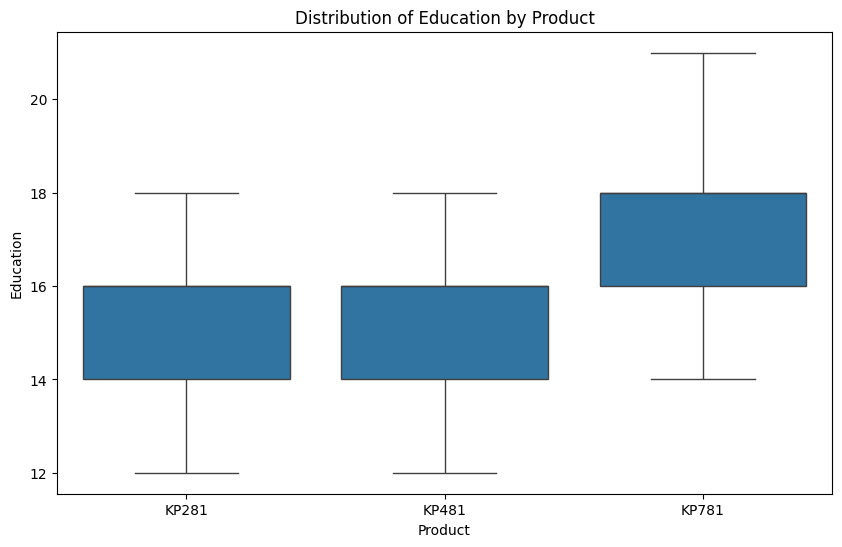

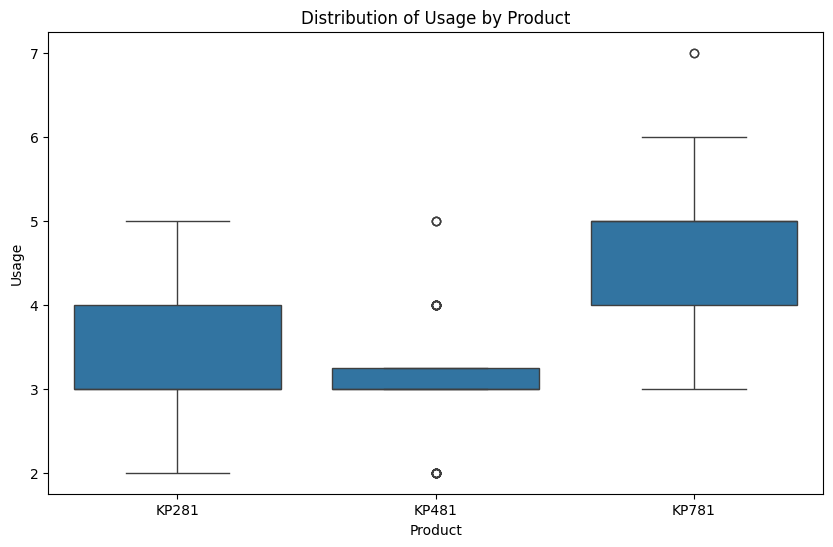

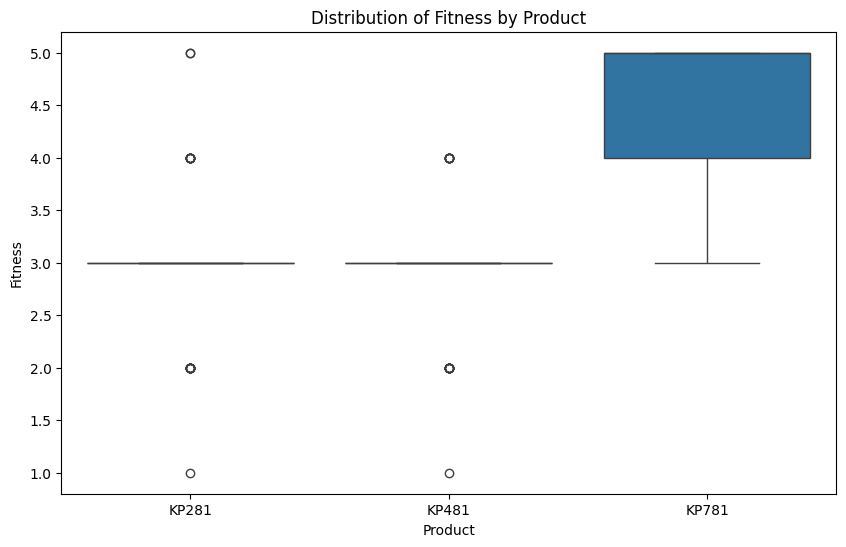

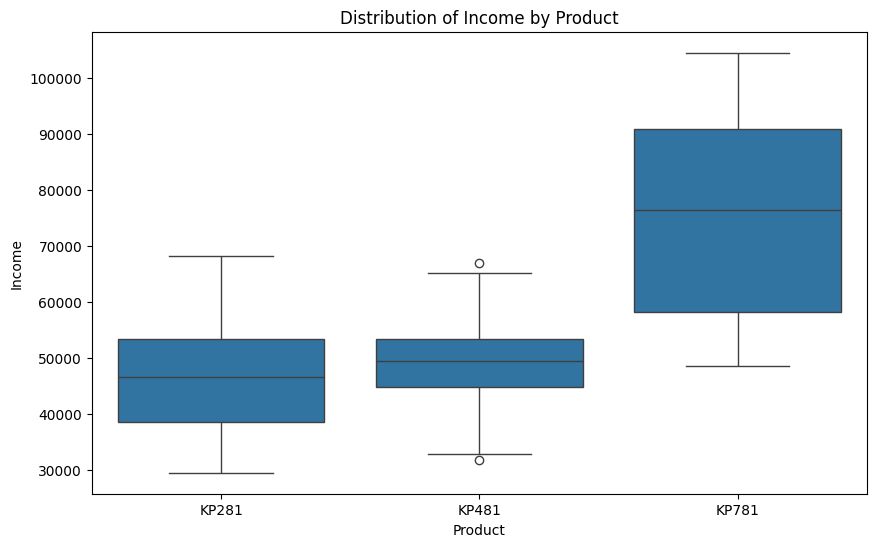

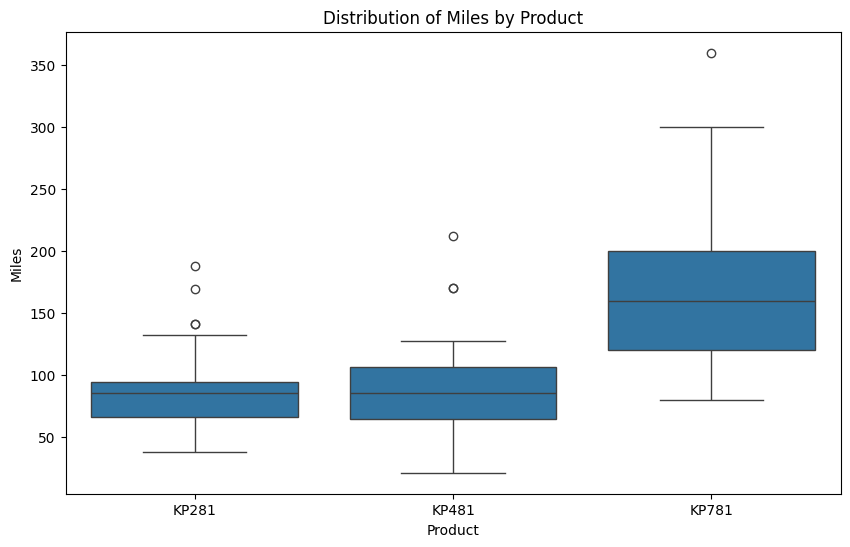

In [10]:
numerical_vars = ['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']
for var in numerical_vars:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=a, x='Product', y=var)
    plt.title(f'Distribution of {var} by Product')
    plt.xlabel('Product')
    plt.ylabel(var)
    plt.show()

Key Findings:
Data Overview: The dataset contains 180 records and 9 columns with no missing values.
Product Popularity: The KP281 is the most popular treadmill, followed by the KP481 and then the KP781.
Customer Profiles by Product:
KP281: Appeals to a younger, broader demographic with lower income, usage, and fitness levels.
KP481: Attracts a slightly older demographic than the KP281, with moderate income, usage, and fitness levels.
KP781: Targets older, highly educated, and higher-income individuals with high usage and fitness levels.
Gender and Marital Status: Partnered individuals are more likely to purchase treadmills across all product lines. The KP781 has a higher proportion of male customers.
Correlations: Strong positive correlations exist between Usage, Fitness, and Miles, indicating that these factors are closely related to how customers use the treadmills. Income, Education, Usage, and Fitness also show moderate positive correlations.
Actionable Recommendations:
Targeted Marketing:
KP281: Market to younger adults and those new to fitness, emphasizing its affordability and ease of use. Focus on broad marketing channels.
KP481: Position as a mid-range option suitable for individuals with some fitness experience and moderate usage goals.
KP781: Target affluent, highly active, and fitness-focused individuals through channels they frequent (e.g., fitness clubs, health and wellness publications). Highlight its advanced features and performance capabilities.
Product Features and Messaging:
For KP281 and KP481, consider messaging around starting a fitness journey, achieving moderate goals, and overall well-being.
For KP781, emphasize performance tracking, advanced training programs, and durability for intense workouts.
Partnership Opportunities: Since partnered individuals are significant buyers, consider promotions or marketing tailored towards couples or families.
Customer Retention: For KP781 customers, given their high engagement, focus on building loyalty through exclusive content, advanced training tips, or community building.

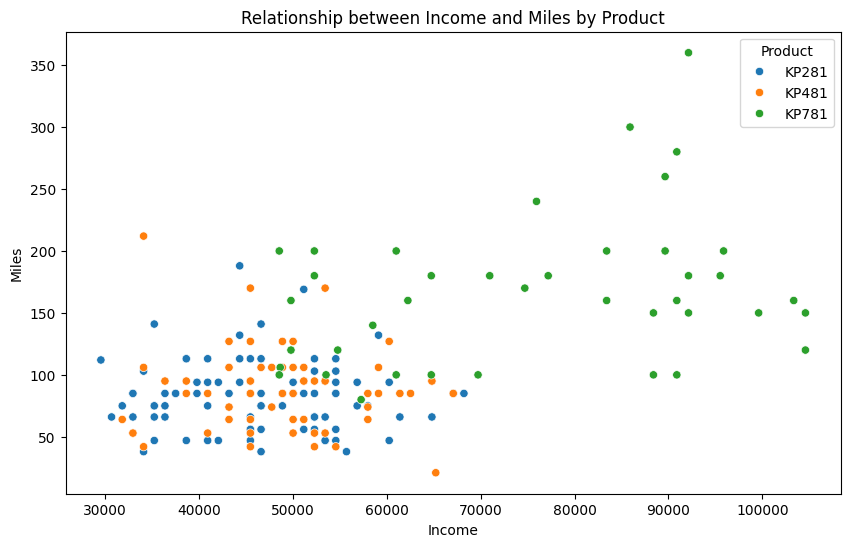

In [11]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=a, x='Income', y='Miles', hue='Product')
plt.title('Relationship between Income and Miles by Product')
plt.xlabel('Income')
plt.ylabel('Miles')
plt.show()

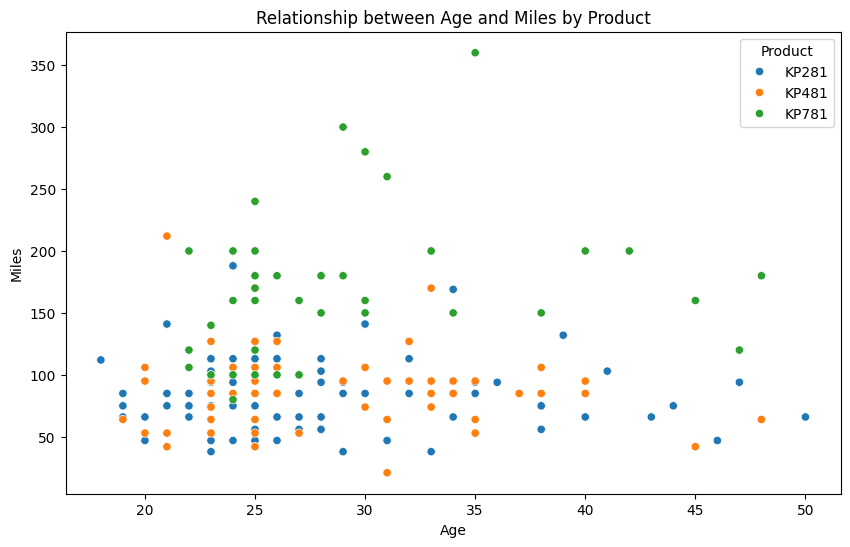

In [12]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=a, x='Age', y='Miles', hue='Product')
plt.title('Relationship between Age and Miles by Product')
plt.xlabel('Age')
plt.ylabel('Miles')
plt.show()

KP281 and KP481: Customers for these products are spread across a younger to middle-aged range. The number of miles they run is generally lower than KP781 customers, with some overlap between the two product groups in terms of age and miles.
KP781: Customers who purchase the KP781 are also spread across a range of ages, but they consistently run a higher number of miles compared to customers of the other two products, regardless of age within this segment.
This plot further highlights the distinct usage patterns of KP781 customers in terms of miles run, and shows how age relates to miles run within each product segment.

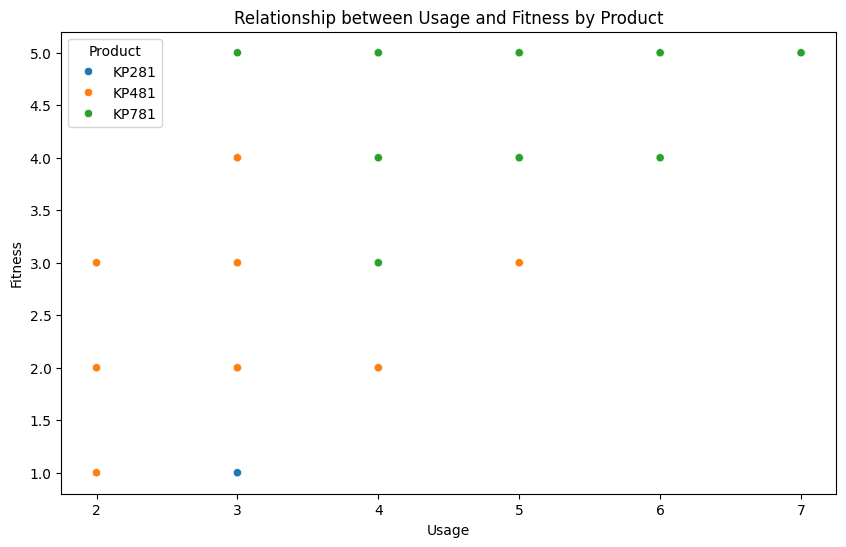

In [13]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=a, x='Usage', y='Fitness', hue='Product')
plt.title('Relationship between Usage and Fitness by Product')
plt.xlabel('Usage')
plt.ylabel('Fitness')
plt.show()

KP281 and KP481: Customers for these products are clustered in the lower to mid-range of both Usage and Fitness levels. There's a noticeable overlap between these two groups.
KP781: Customers who purchase the KP781 consistently report higher Usage and Fitness levels. There is a clear distinction between KP781 customers and those of the other two products based on these two variables.

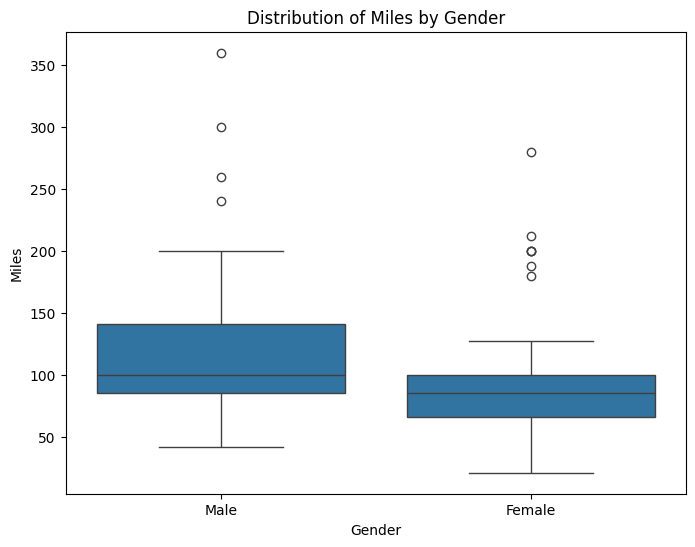

In [14]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=a, x='Gender', y='Miles')
plt.title('Distribution of Miles by Gender')
plt.xlabel('Gender')
plt.ylabel('Miles')
plt.show()

In [15]:
# Marginal Probability of Product Purchases
print("Marginal Probability of Product Purchases:")
marginal_product_prob = pd.crosstab(index=a['Product'], columns='count', normalize=True)
print(marginal_product_prob)
print("\n" + "="*50 + "\n")

# Conditional Probability of Product Purchase based on Gender
print("Conditional Probability of Product Purchase based on Gender:")
conditional_gender_prob = pd.crosstab(index=a['Gender'], columns=a['Product'], normalize='index')
print(conditional_gender_prob)
print("\n" + "="*50 + "\n")

# Conditional Probability of Product Purchase based on Marital Status
print("Conditional Probability of Product Purchase based on Marital Status:")
conditional_marital_prob = pd.crosstab(index=a['MaritalStatus'], columns=a['Product'], normalize='index')
print(conditional_marital_prob)
print("\n" + "="*50 + "\n")

# Conditional Probability of Product Purchase based on Usage
print("Conditional Probability of Product Purchase based on Usage:")
conditional_usage_prob = pd.crosstab(index=a['Usage'], columns=a['Product'], normalize='index')
print(conditional_usage_prob)
print("\n" + "="*50 + "\n")

# Conditional Probability of Product Purchase based on Fitness
print("Conditional Probability of Product Purchase based on Fitness:")
conditional_fitness_prob = pd.crosstab(index=a['Fitness'], columns=a['Product'], normalize='index')
print(conditional_fitness_prob)
print("\n" + "="*50 + "\n")

# Example of a specific conditional probability: Probability of purchasing KP481 given the customer is Female
prob_kp481_given_female = conditional_gender_prob.loc['Female', 'KP481']
print(f"Probability of purchasing KP481 given the customer is Female: {prob_kp481_given_female:.2f}")

Marginal Probability of Product Purchases:
col_0       count
Product          
KP281    0.444444
KP481    0.333333
KP781    0.222222


Conditional Probability of Product Purchase based on Gender:
Product     KP281     KP481     KP781
Gender                               
Female   0.526316  0.381579  0.092105
Male     0.384615  0.298077  0.317308


Conditional Probability of Product Purchase based on Marital Status:
Product           KP281     KP481     KP781
MaritalStatus                              
Partnered      0.448598  0.336449  0.214953
Single         0.438356  0.328767  0.232877


Conditional Probability of Product Purchase based on Usage:
Product     KP281     KP481     KP781
Usage                                
2        0.575758  0.424242  0.000000
3        0.536232  0.449275  0.014493
4        0.423077  0.230769  0.346154
5        0.117647  0.176471  0.705882
6        0.000000  0.000000  1.000000
7        0.000000  0.000000  1.000000


Conditional Probability of Product Pu

 customer profiles for the KP281, KP481, and KP781:

KP281 Customer Profile:

Age: Tends to attract a younger customer base (as seen in the boxplot of Age by Product).
Gender: Purchased by both males and females, with a slightly higher proportion of female customers compared to the KP781 (as seen in the count plot of Gender by Product and conditional probabilities).
Income: Generally have lower incomes compared to customers of the other models (as seen in the boxplot of Income by Product and the Income vs. Miles scatter plot).
Education: Shows a range of education levels.
Usage & Fitness: Typically have lower planned usage and self-rated fitness levels (as seen in the count plots and boxplots of Usage and Fitness by Product, and the Usage vs. Fitness scatter plot).
Miles: Tend to run fewer miles (as seen in the boxplot of Miles by Product and the scatter plots).
Marital Status: Purchased by both single and partnered individuals, with a slightly higher number of partnered customers.
KP481 Customer Profile:

Age: Slightly older on average than KP281 customers.
Gender: Similar gender distribution to the KP281, with a relatively even split between males and females.
Income: Have moderate incomes, generally higher than KP281 customers but lower than KP781 customers.
Education: Shows a range of education levels, similar to KP281.
Usage & Fitness: Have moderate planned usage and self-rated fitness levels, falling between KP281 and KP781 customers.
Miles: Run a moderate number of miles.
Marital Status: Similar marital status distribution to the KP281, with more partnered than single customers.
KP781 Customer Profile:

Age: Attracts a slightly older demographic compared to the other two models, though still with a range of ages.
Gender: Has a noticeably higher proportion of male customers (as seen in the count plot of Gender by Product and conditional probabilities).
Income: Have significantly higher incomes (as seen in the boxplot of Income by Product and the Income vs. Miles scatter plot).
Education: Tend to have higher education levels (as seen in the boxplot of Education by Product).
Usage & Fitness: Report high planned usage and self-rated fitness levels (as seen in the count plots and boxplots of Usage and Fitness by Product, and the Usage vs. Fitness scatter plot).
Miles: Consistently run a higher number of miles regardless of age (as seen in the boxplot of Miles by Product and the scatter plots).
Marital Status: Purchased by both single and partnered individuals, with a slightly higher number of partnered customers.
These profiles summarize the key characteristics of the typical customer for each Aerofit treadmill product based on our analysis.


Comprehensive Summary of Key Findings:

Our analysis of the Aerofit treadmill dataset, consisting of 180 records and 9 columns with no missing values, has revealed distinct customer profiles for each product and important relationships between various factors.

Product Popularity: The KP281 is the most popular product (44.4% of purchases), followed by the KP481 (33.3%), and the KP781 (22.2%).
Customer Segmentation by Product:
KP281: Appeals to a younger, broader demographic with lower income, usage (mostly 2-3 times/week), and fitness levels (mostly 3). Marginal probability of purchase is highest.
KP481: Attracts a slightly older demographic than the KP281, with moderate income, usage (mostly 3 times/week), and fitness levels (mostly 3).
KP781: Targets older, highly educated, and higher-income individuals with high usage (mostly 4-5 times/week) and fitness levels (mostly 5). This group consistently runs more miles.
Gender and Marital Status: Partnered individuals are more likely to purchase treadmills across all product lines. While both genders purchase KP281 and KP481, the KP781 has a significantly higher proportion of male customers (31.7% of male purchases are KP781, compared to 9.2% of female purchases).
Correlations: Strong positive correlations exist between Usage, Fitness, and Miles, indicating that these factors are closely related to how customers use the treadmills. Income, Education, Usage, and Fitness also show moderate positive correlations. Higher income and age are associated with purchasing the KP781, which in turn correlates with higher usage, fitness, and miles run.
Probabilities: We observed variations in the probability of purchasing a product based on gender, marital status, usage, and fitness levels, reinforcing the distinct customer profiles for each product. For example, the probability of purchasing a KP781 is much higher for customers with higher usage and fitness levels.
Actionable Recommendations:

Based on these findings, here are some actionable recommendations for Aerofit to improve business and target new customers:

Targeted Marketing Campaigns:
KP281: Focus marketing on affordability, ease of use, and benefits for beginners or those with general wellness goals. Target younger adults and broader demographics through mass marketing channels.
KP481: Position as a step-up from the entry-level model, suitable for individuals with some fitness experience and moderate goals. Highlight features that support slightly more intense workouts.
KP781: Market as a premium product for serious fitness enthusiasts. Emphasize advanced features, performance tracking, durability, and the ability to support high-intensity training. Target affluent, highly educated, and fitness-focused individuals through specialized fitness media, clubs, and online communities. Specifically tailor some marketing towards male customers given their higher propensity to purchase this model.
Product Development and Feature Prioritization:
For KP281 and KP481, consider features that encourage consistent use and gradual improvement in fitness.
For KP781, continue to innovate with advanced technology, personalized workout programs, and performance metrics that appeal to highly active users.
Partnership and Loyalty Programs:
Given the higher purchase rate among partnered individuals, explore promotions or bundles for couples or families.
Develop a customer retention strategy for KP781 buyers, perhaps offering exclusive access to advanced training content, loyalty discounts on accessories, or community engagement platforms, as they represent a highly engaged and valuable customer segment.
Sales Channel Strategy:
Ensure the KP781 is prominently featured in channels frequented by higher-income and fitness-focused consumers.
Make the KP281 widely accessible through various retail and online platforms to capture the broader market.
By leveraging these insights, Aerofit can optimize its marketing spend, product positioning, and customer engagement strategies to effectively reach and serve the target audience for each treadmill product, ultimately driving business growth.